<a href="https://colab.research.google.com/github/michelucci/zhaw-dlcourse-spring2019/blob/master/Week%204%20-%20One%20Neuron/Week%204%20-%20MNIST%20with%20Logistic%20Regression%20and%20tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks and Deep Learning for Life Sciences and Health Applications - An introductory course about theoretical fundamentals, case studies and implementations in python and tensorflow

(C) Umberto Michelucci 2018 - umberto.michelucci@gmail.com 

github repository: https://github.com/michelucci/zhaw-dlcourse-spring2019

Spring Semester 2019

# Python implementation of Logistic Regression with tensorflow

### Abstract

In this notebook I develop a complete version of Logistic Regression with one neuron. I apply the model to a subset of MNIST data containing only the digits 1 and 2 (see the data preparation part to see how to do it) to do binary classification. 

## Libraries

In [0]:
import numpy as np
from sklearn.datasets import fetch_mldata

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from random import *

## Data preparation

To get MNIST data we use the function fetch_mldata, in the datasets package. Let's get all the dataset, and then we will select only the digits we want.

In [0]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [0]:
X,y = mnist["data"], mnist["target"]

In [0]:
X.shape

(70000, 784)

In [0]:
y.shape

(70000,)

To know how many digits we have we can run this simple code

In [0]:
total = 0
for i in range(10):
    print ("digit", i, "appear", np.count_nonzero(y == i), "times")

digit 0 appear 6903 times
digit 1 appear 7877 times
digit 2 appear 6990 times
digit 3 appear 7141 times
digit 4 appear 6824 times
digit 5 appear 6313 times
digit 6 appear 6876 times
digit 7 appear 7293 times
digit 8 appear 6825 times
digit 9 appear 6958 times


In [0]:
total = 0
for i in range(10):
    print ("digit", i, "makes", np.around(np.count_nonzero(y == i)/70000.0*100.0, decimals=1), "% of the 70000 observations")

digit 0 makes 9.9 % of the 70000 observations
digit 1 makes 11.3 % of the 70000 observations
digit 2 makes 10.0 % of the 70000 observations
digit 3 makes 10.2 % of the 70000 observations
digit 4 makes 9.7 % of the 70000 observations
digit 5 makes 9.0 % of the 70000 observations
digit 6 makes 9.8 % of the 70000 observations
digit 7 makes 10.4 % of the 70000 observations
digit 8 makes 9.8 % of the 70000 observations
digit 9 makes 9.9 % of the 70000 observations


# Let's check the distribution if we create a dev dataset

In [0]:
np.random.seed(42)
rnd = np.random.rand(len(y)) < 0.8

train_y = y[rnd]
dev_y = y[~rnd]

print(train_y.shape)
print(dev_y.shape)

(56056,)
(13944,)


Note: datasets loaded by scikit-learn have a dictionary structure. 

- a DESCR structure describing the dataset
- a ```data``` key containing an array with one row per instance and one column per feature
- a ```target``` with an array with the labels

we have 70000 digits available, from 0 to 9. Let's define a helper function that will allow us to visualize the digits.

In [0]:
total = 0
for i in range(10):
    print ("digit", i, "makes", np.around(np.count_nonzero(train_y == i)/56056.0*100.0, decimals=1), "% of the 56056 observations")

digit 0 makes 9.9 % of the 56056 observations
digit 1 makes 11.3 % of the 56056 observations
digit 2 makes 9.9 % of the 56056 observations
digit 3 makes 10.1 % of the 56056 observations
digit 4 makes 9.8 % of the 56056 observations
digit 5 makes 9.0 % of the 56056 observations
digit 6 makes 9.8 % of the 56056 observations
digit 7 makes 10.4 % of the 56056 observations
digit 8 makes 9.8 % of the 56056 observations
digit 9 makes 9.9 % of the 56056 observations


# Case for splitting with sorting

In [0]:
srt = np.zeros_like(y,  dtype=bool)

np.random.seed(42)
srt[0:56000] = True

train_y = y[srt]
dev_y = y[~srt]

In [0]:
total = 0
for i in range(10):
    print ("class", i, "makes", np.around(np.count_nonzero(train_y == i)/70000.0*100.0, decimals=1), "% of the 70000 observations")

class 0 makes 8.5 % of the 70000 observations
class 1 makes 9.6 % of the 70000 observations
class 2 makes 8.5 % of the 70000 observations
class 3 makes 8.8 % of the 70000 observations
class 4 makes 8.3 % of the 70000 observations
class 5 makes 7.7 % of the 70000 observations
class 6 makes 8.5 % of the 70000 observations
class 7 makes 9.0 % of the 70000 observations
class 8 makes 8.4 % of the 70000 observations
class 9 makes 2.8 % of the 70000 observations


In [0]:
total = 0
for i in range(2):
    print ("class", i, "makes", np.around(np.count_nonzero(dev_y == i)/13944.0*100.0, decimals=1), "% of the 13944 observations")

class 0 makes 7.0 % of the 13944 observations
class 1 makes 8.1 % of the 13944 observations


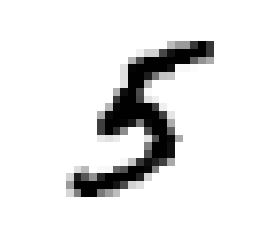

In [0]:
def plot_digit(some_digit):
    
    some_digit_image = some_digit.reshape(28,28)

    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()
    
plot_digit(X[36003])

Let's check the relative label...

In [0]:
y[36003]

5.0

### Train and test set preparation

Let's first reduce our dataset only to 1 and 2 digits.

In [0]:
X_train = X[np.any([y == 1,y == 2], axis = 0)]
y_train = y[np.any([y == 1,y == 2], axis = 0)]

The size of our dataset is

In [0]:
print(X_train.shape)
print(y_train.shape)

(14867, 784)
(14867,)


In our reduced dataset how many 1 and 2 do we have?

In [0]:
print("number of 1:", np.count_nonzero(y_train == 1))
print("number of 2:", np.count_nonzero(y_train == 2))

number of 1: 7877
number of 2: 6990


## Normalisation

Let's normalise our data. The pixel will have a value between 0 and 255 (gray values). Let's normalise the value between 0 and 1.

In [0]:
X_train_normalised = X_train/255.0

Remember that we need features along the rows, and training cases along the columns. So let's reshape our dataset

In [0]:
X_train_tr = X_train_normalised.transpose()
y_train_tr = y_train.reshape(1,y_train.shape[0])

print(X_train_tr.shape)
print(y_train_tr.shape)

n_dim = X_train_tr.shape[0]
dim_train = X_train_tr.shape[1]


print(n_dim)
print("The training dataset has", dim_train, "observations (m).")

(784, 14867)
(1, 14867)
784
The training dataset has 14867 observations (m).


We will need to rescale our lables. Remember we will compare them in the cost function with 0 and 1 (proabilities) and therefore our class labels must be 0 and 1, not 1 and 2. So the following step take care of it.

In [0]:
y_train_shifted = y_train_tr - 1

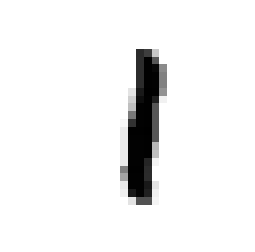

[ 0.]


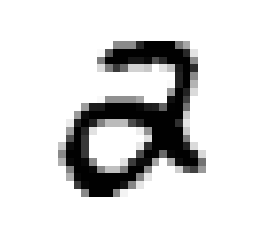

[ 1.]


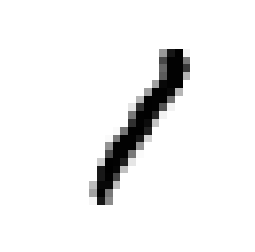

[ 0.]


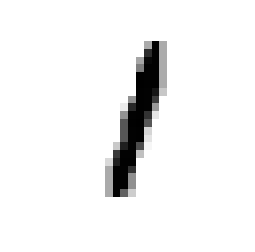

[ 0.]


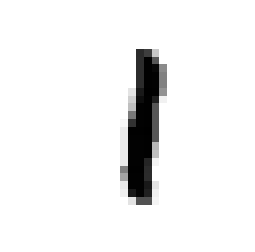

In [0]:
plot_digit(X_train_tr[:,1005])
print(y_train_shifted[:,1005])
plot_digit(X_train_tr[:,8000])
print(y_train_shifted[:,8000])
plot_digit(X_train_tr[:,456])
print(y_train_shifted[:,456])
plot_digit(X_train_tr[:,567])
print(y_train_shifted[:,567])

Xtrain = X_train_tr
ytrain = y_train_shifted

plot_digit(Xtrain[:,1005])

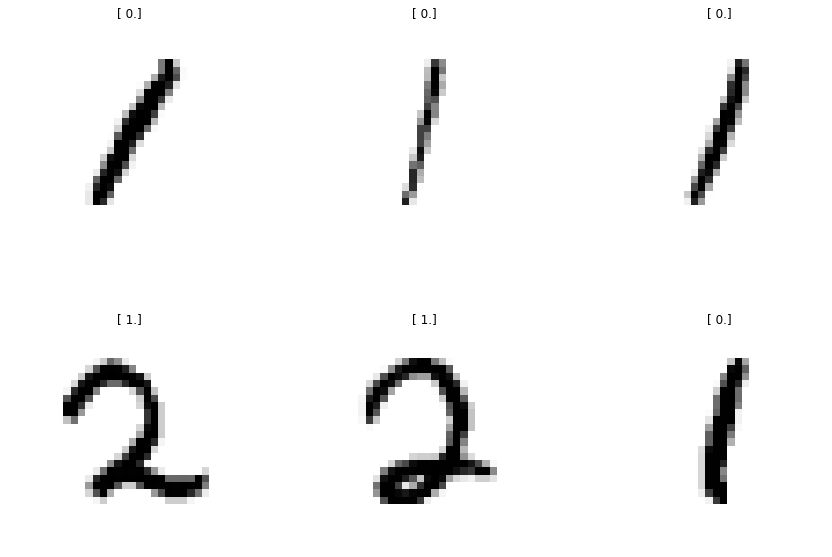

In [0]:
f = plt.figure(figsize=(15,15));
count = 1
for i in [randint(1, 14867),randint(1, 14867),randint(1, 14867),randint(1, 14867),randint(1, 14867),randint(1, 14867)]:
    plt.subplot(3,3,count)
    count = count + 1
    plt.subplots_adjust(hspace=0.5)
    plt.title(ytrain[:,i])
    some_digit_image = Xtrain[:,i].reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    pass

# Tensorflow Implementation

In [0]:
import tensorflow as tf

In [0]:
print(Xtrain.shape)
print(ytrain.shape)

(784, 14867)
(1, 14867)


In [0]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
learning_rate = tf.placeholder(tf.float32, shape=())

#W = tf.Variable(tf.random_normal([1, n_dim]))/10.0
W = tf.Variable(tf.zeros([1, n_dim]))
#b = tf.Variable(tf.random_normal([1]))/10.0
b = tf.Variable(tf.zeros(1))

init = tf.global_variables_initializer()

In [0]:
y_ = tf.sigmoid(tf.matmul(W,X)+b)
cost = - tf.reduce_mean(Y * tf.log(y_)+(1-Y) * tf.log(1-y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [0]:
def run_logistic_model(learning_r, training_epochs, train_obs, train_labels, debug = False):
    sess = tf.Session()
    sess.run(init)
    
    cost_history = np.empty(shape=[0], dtype = float)

    for epoch in range(training_epochs+1):
        
        sess.run(training_step, feed_dict = {X: train_obs, Y: train_labels, learning_rate: learning_r})

        cost_ = sess.run(cost, feed_dict={ X:train_obs, Y: train_labels, learning_rate: learning_r})
        cost_history = np.append(cost_history, cost_)
        
        if (epoch % 250 == 0) & debug:
            print("Reached epoch",epoch,"cost J =", str.format('{0:.6f}', cost_))
            
    return sess, cost_history

In [0]:
sess = tf.Session()
sess.run(init)
print(sess.run(y_, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 2}))
print(sess.run(cost, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 2}))
sess.close()

[[ 0.5  0.5  0.5 ...,  0.5  0.5  0.5]]
0.693133


In [0]:
sess, cost_history1 = run_logistic_model(learning_r = 0.01, 
                                training_epochs = 500, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 0.678540
Reached epoch 250 cost J = 0.154095
Reached epoch 500 cost J = 0.108484


In [0]:
sess, cost_history2 = run_logistic_model(learning_r = 0.005, 
                                training_epochs = 500, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True) 

Reached epoch 0 cost J = 0.685799
Reached epoch 250 cost J = 0.222014
Reached epoch 500 cost J = 0.154386


# Plot of the cost function vs. the number of epochs

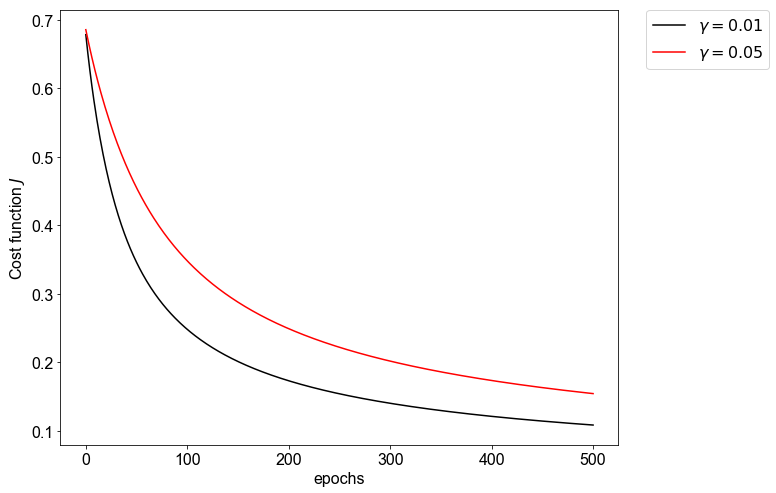

In [0]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history1, ls='solid', color = 'black', label = '$\gamma = 0.01$')
ax.plot(cost_history2, ls='solid', color = 'red', label = '$\gamma = 0.05$')
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$', fontsize = 16)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)

**CAREFUL** it will take some time to run!

In [0]:
sess, cost_history = run_logistic_model(learning_r = 0.05, 
                                training_epochs = 750, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 0.623632
Reached epoch 250 cost J = 0.071436
Reached epoch 500 cost J = 0.054990
Reached epoch 750 cost J = nan


In [0]:
sess, cost_history = run_logistic_model(learning_r = 1e-3, 
                                training_epochs = 1500, 
                                train_obs = Xtrain, 
                                train_labels = ytrain, 
                                debug = True)

Reached epoch 0 cost J = 0.691670
Reached epoch 250 cost J = 0.457857
Reached epoch 500 cost J = 0.349886
Reached epoch 750 cost J = 0.289003
Reached epoch 1000 cost J = 0.249949
Reached epoch 1250 cost J = 0.222616
Reached epoch 1500 cost J = 0.202293


In [0]:
correct_prediction1=tf.equal(tf.greater(y_, 0.5), tf.equal(Y,1))

accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))

print(sess.run(accuracy1, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))

0.971077


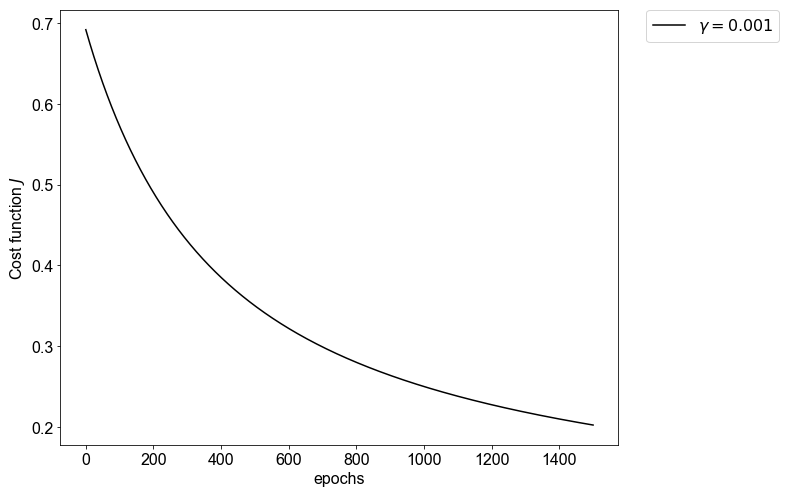

In [0]:
plt.rc('font', family='arial')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
    
plt.tight_layout()

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(cost_history, ls='solid', color = 'black', label = '$\gamma = 0.001$')
ax.set_xlabel('epochs', fontsize = 16)
ax.set_ylabel('Cost function $J$', fontsize = 16)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 16)
plt.tick_params(labelsize=16)

In [0]:
print(sess.run(y_, feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))
print(sess.run(tf.greater(y_, 0.5), feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))
print(sess.run(tf.less(y_, 0.5), feed_dict={X:Xtrain, Y: ytrain, learning_rate: 0.05}))

[[ 0.20365097  0.20278002  0.15145989 ...,  0.97013026  0.82452655
   0.96070677]]
[[False False False ...,  True  True  True]]
[[ True  True  True ..., False False False]]


## Logistic Regression with sklearn

As a side note, here is the code to see how easy it is in comparison to do the same with the sklearn library... 

In [0]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()

In [0]:
XX = Xtrain.T
YY = ytrain.T.ravel()

logistic.fit(XX,YY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
logistic.score(XX,YY)

0.99582968991726639

The score is calculated as 

In [0]:
sum(logistic.predict(XX) == YY) / len(XX)

0.99582968991726639

Check: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 